# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
print(tf.__version__)

2.2.0


In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dropout, Dense, Flatten
from tensorflow.keras.models import Model

In [0]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
X_train, X_test = X_train / 255.0 , X_test / 255.0 
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [17]:
# X_train = np.expand_dims(X_train, -1)
# X_test = np.expand_dims(X_test, -1)
print(X_train.shape)
print(X_test.shape)
# SHAPE 
# N x H x W x Colors 
# Colors = 1 for grayscale 
# Fashion MNIST is grayscale

(60000, 28, 28)
(10000, 28, 28)


In [18]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [19]:
classes = len(set(y_train))
print(classes)

10


In [21]:
 X_train[0].shape

(784,)

In [0]:
input_shape = X_train[0].shape

## ZEROS


In [0]:
i_layer = Input(shape = input_shape)
h_layer = Dense(128, activation='relu')(i_layer)
h_layer = Dense(64, activation='relu')(h_layer)
h_layer = Dense(128, activation='relu')(h_layer)
o_layer = Dense(X_train[0].shape[0], activation=None)(h_layer)
model = Model(i_layer, o_layer)


In [67]:
model.compile(optimizer='adam', 
              loss = "mse")

report = model.fit(X_train, X_train, epochs=20, batch_size=200)

Epoch 1/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0356
Epoch 2/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0181
Epoch 3/20
300/300 [==============================] - 3s 11ms/step - loss: 0.0162
Epoch 4/20
300/300 [==============================] - 3s 11ms/step - loss: 0.0157
Epoch 5/20
300/300 [==============================] - 3s 11ms/step - loss: 0.0155
Epoch 6/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0154
Epoch 7/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0153
Epoch 8/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0152
Epoch 9/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0152
Epoch 10/20
300/300 [==============================] - 3s 10ms/step - loss: 0.0149
Epoch 11/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0148
Epoch 12/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0147
Epoch 13/20
300/300 [

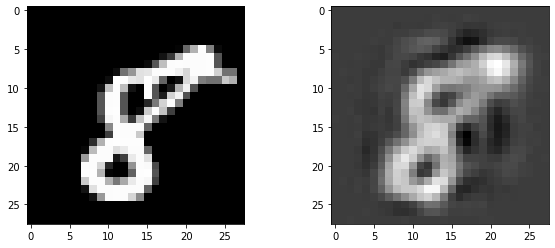

In [68]:
idx = np.random.randint(0, len(X_train))
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].imshow(X_train[idx].reshape(28,28), cmap='gray')
X_decoded = model.predict(X_train[[idx]])
ax[1].imshow(X_decoded.reshape(28,28), cmap='gray')